In [1]:
from ROOT import TCanvas, gPad
from ROOT import TH1F, TGraph, TGraphErrors
from ROOT import gStyle
from array import array
import math
import random

c1 = TCanvas( 'c1', 'Simple Integration Example', 200, 10, 1200, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 42 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(1,2)

Welcome to JupyROOT 6.16/00


In [2]:
def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

In [3]:
gStyle.SetOptFit(1)

In [4]:
random.seed(1)

In [5]:
max_order = 6
min_order = 2
nbins = 20

norders = max_order - min_order + 1
nbin = nbins

np = array('d')
enp = array('d')
sum2 = array('d')
esum2 = array('d')
esum3 = array('d')
np2 = array('d')
np3 = array('d')

sum = [[0 for x in range(0,nbin)] for y in range(0,norders)]

for j in range(min_order,max_order+1):
    npoints = math.pow(10,j)
    np.append(npoints)
    np2.append(1.0/math.sqrt(npoints))
    np3.append(math.log(1.0*npoints))
    enp.append(0.0)
    sum2.append(0.0)
    esum2.append(0)
    esum3.append(0)
    for k in range(0,nbin):
        xlow = 0.0
        xhigh = 1.0
        dx = (xhigh-xlow)/npoints
        
        for i in range(0,int(npoints)):
            xval = xlow+random.random()*(xhigh-xlow)
            yval = generator_function(xval)
            sum[j-min_order][k] += dx*yval
            
    for k in range(0,nbin):
        sum2[j-min_order] += sum[j-min_order][k]/nbin
        
    for k in range(0,nbin):
        esum2[j-min_order] += math.pow((sum[j-min_order][k]-sum2[j-min_order]),2)/nbin
    
    esum2[j-min_order]=math.sqrt(esum2[j-min_order])
    print("Integral = %f +/- %f for npoints = %f" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("Error = %f" % math.fabs(1.0-sum2[j-min_order]))
    esum3[j-min_order]=math.log(esum2[j-min_order])
    
    

Integral = 0.996545 +/- 0.048402 for npoints = 100.000000
Error = 0.003455
Integral = 1.001320 +/- 0.011317 for npoints = 1000.000000
Error = 0.001320
Integral = 0.999330 +/- 0.003944 for npoints = 10000.000000
Error = 0.000670
Integral = 0.999991 +/- 0.001551 for npoints = 100000.000000
Error = 0.000009
Integral = 0.999935 +/- 0.000613 for npoints = 1000000.000000
Error = 0.000065


In [6]:
gr = TGraphErrors(norders,np,sum2,enp,esum2);
gr2 = TGraph(norders,np3,esum3);

gr.SetLineColor(2);
gr.SetLineWidth(4);
gr.SetMarkerColor(4);
gr.SetMarkerStyle(21);
gr.SetTitle("MC integration 1");
gr.GetXaxis().SetTitle("N points");
gr.GetYaxis().SetTitle("Integral");
gr2.SetLineColor(2);
gr2.SetLineWidth(4);
gr2.SetMarkerColor(4);
gr2.SetMarkerStyle(21);
gr2.SetTitle("MC integration 2");
gr2.GetXaxis().SetTitle("log(Npoints)");
gr2.GetYaxis().SetTitle("log(Error in Integral)");

c1.cd(1);
gPad.SetLogx()
gr.Draw("AP");
c1.cd(2);
gr2.Draw("AP");
gr2.Fit("pol1");


****************************************
Minimizer is Linear
Chi2                      =     0.113786
NDf                       =            3
p0                        =     -1.09213   +/-   0.261288    
p1                        =     -0.46579   +/-   0.0267466   


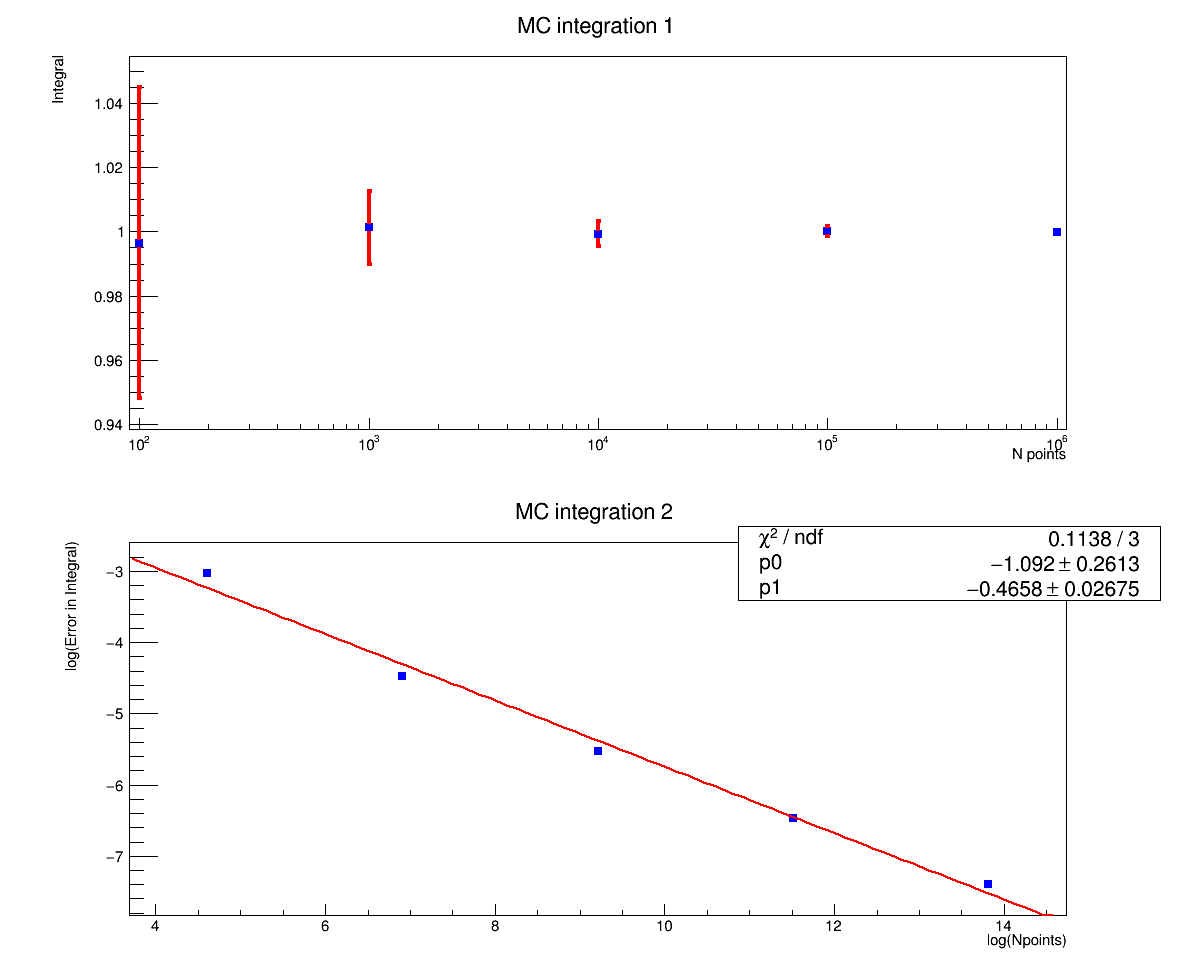

In [7]:
c1.Draw()